In [1]:
import pandas as pd
tables = pd.read_html('https://trucksuvidha.com/')
df = tables[0]
df.head()

,Source City,Destination City,Distance,Weight (MT),Schd. Date,Material,Truck Type,Posted By,Details,Quotation
0,Chamrajnagar (KA),Banglore (KA),184 km,Do Not Know,12-Mar-2025,Packed Food,Canters 17feet / ...,Transporter,View Contact,Quote Now
1,Vizag (AP),Banglore (KA),"1,002 km",Do Not Know,12-Mar-2025,Others,Canters 17feet / ...,Transporter,View Contact,Quote Now
2,Meerut (UP),Noida (UP),73.9 km,Upto 12 MT,12-Mar-2025,Others,Flat Bed Trailers...,Transporter,View Contact,Quote Now
3,Varanasi (UP),Bhopal (MP),761 km,Upto 12 MT,12-Mar-2025,Others,Truck 15MT / 10 w...,Transporter,View Contact,Quote Now
4,Bareilly (UP),Rajkot (GJ),"1,441 km",Do Not Know,12-Mar-2025,Others,Canters 17feet / ...,Transporter,View Contact,Quote Now


In [3]:
import pandas as pd
import datetime
import os

def collect_and_store_data():
    #"""Fetches data from the website and stores it with a timestamp."""
    tables = pd.read_html('https://trucksuvidha.com/')
    df = tables[0]
    # Get current timestamp
    timestamp = datetime.datetime.now().strftime("%Y/%m/%d_%H:%M:%S")
    # Add timestamp column to DataFrame
    df['timestamp'] = timestamp
    # File to store the data
    file_path = '/content/trucksuvidha_data.csv'
    # If file exists, append data. Otherwise, create and write data with header.
    if os.path.exists(file_path):
        df.to_csv(file_path, mode='a', header=False, index=False)
    else:
        df.to_csv(file_path, mode='w', header=True, index=False)
    print(f"Data collected and saved at {timestamp}")

In [5]:
!pip install schedule

In [5]:
import schedule
import time

# Schedule the function to run every 10 minutes
schedule.every(1/6).hours.do(collect_and_store_data)

while True:
  schedule.run_pending()
  time.sleep(1)


KeyboardInterrupt



In [7]:
import pandas as pd

# Assuming your DataFrame is named 'df'
df = pd.read_csv(r"C:\Users\lokes\Desktop\Data Engineering\trucksuvidha_loaddata.csv")

# Drop duplicate rows
df.drop_duplicates(inplace=True)


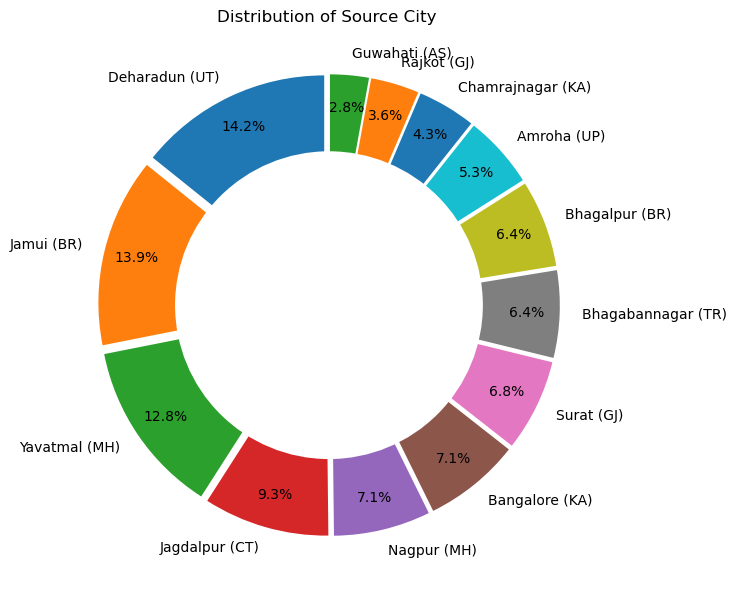

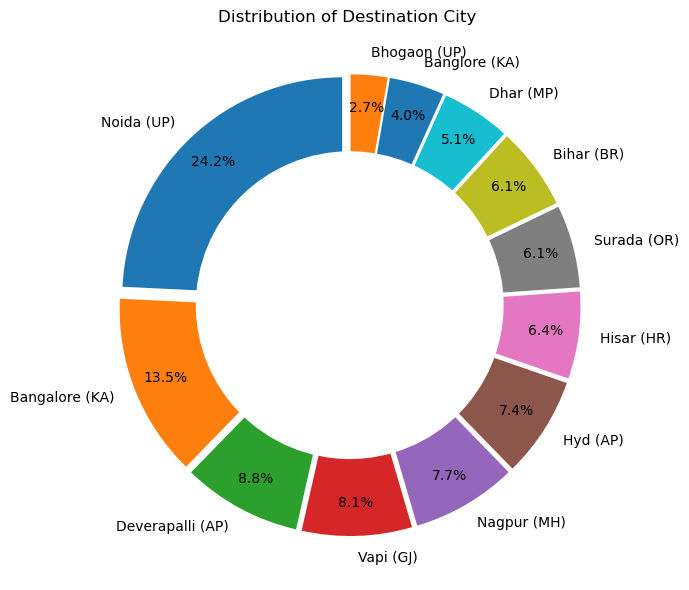

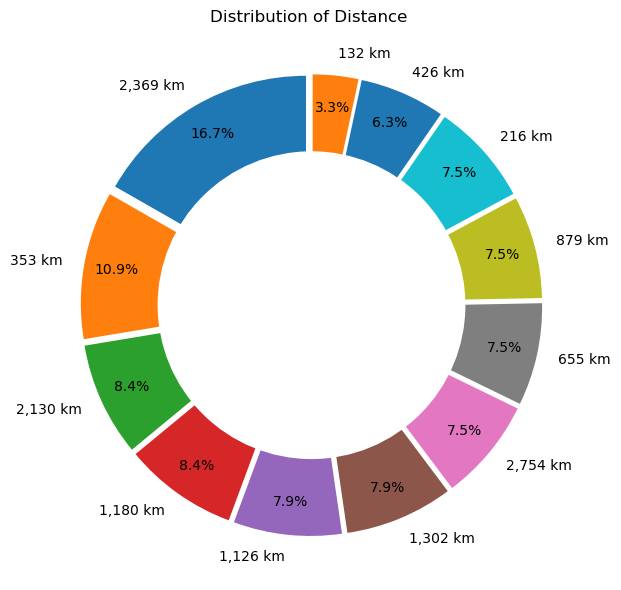

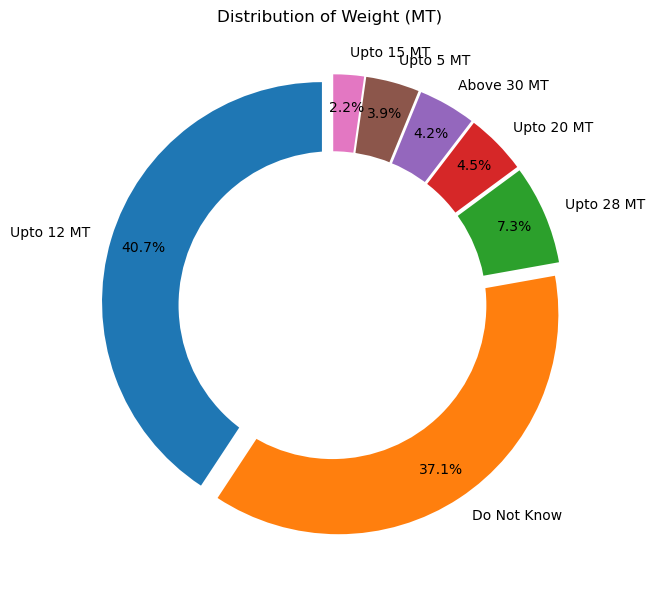

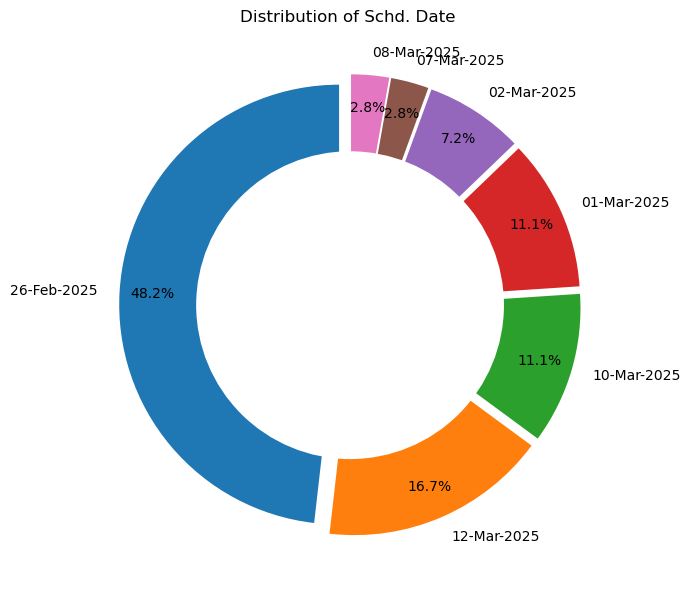

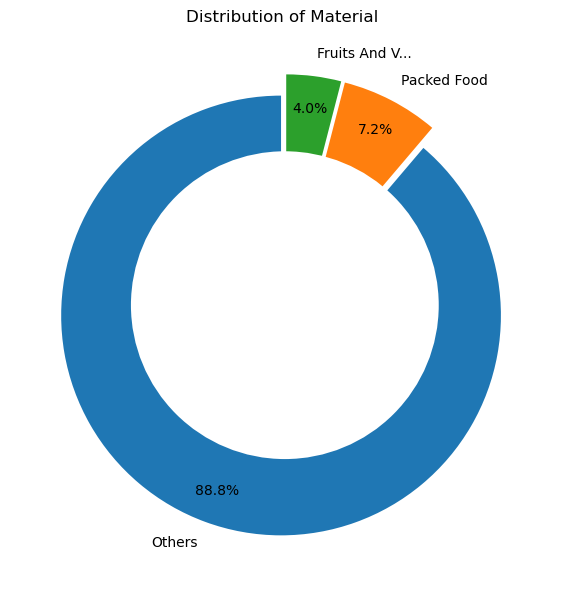

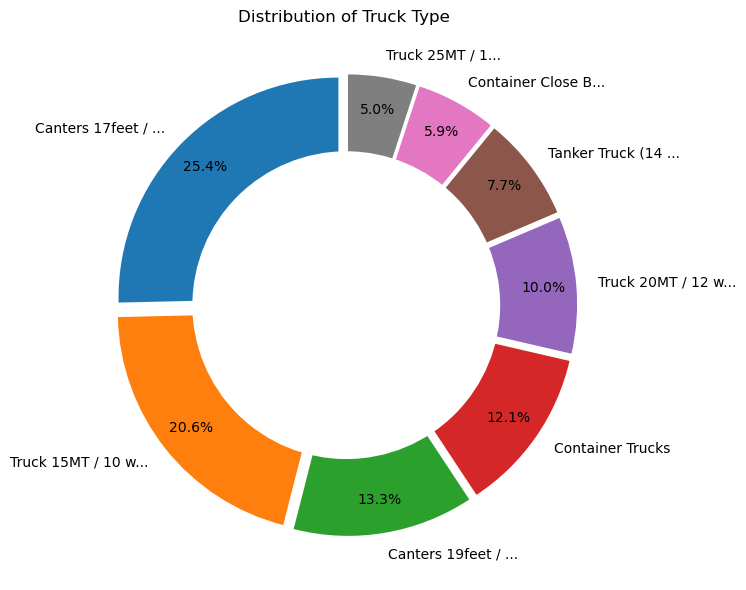

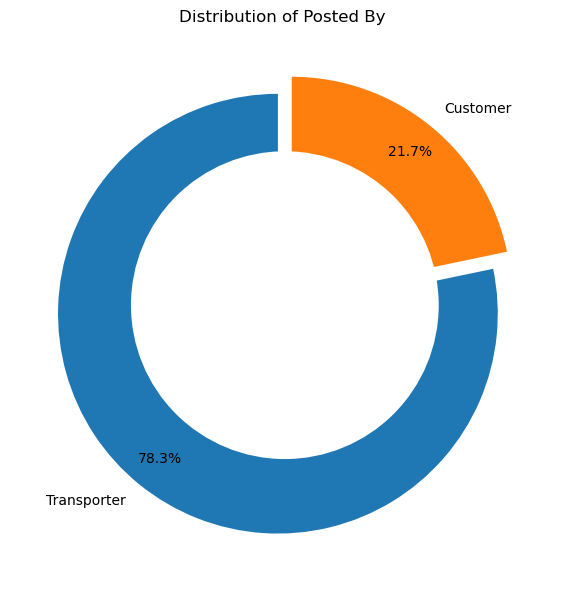

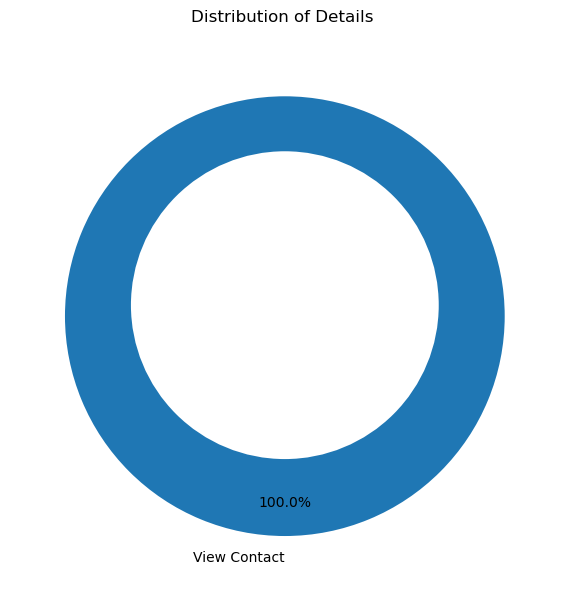

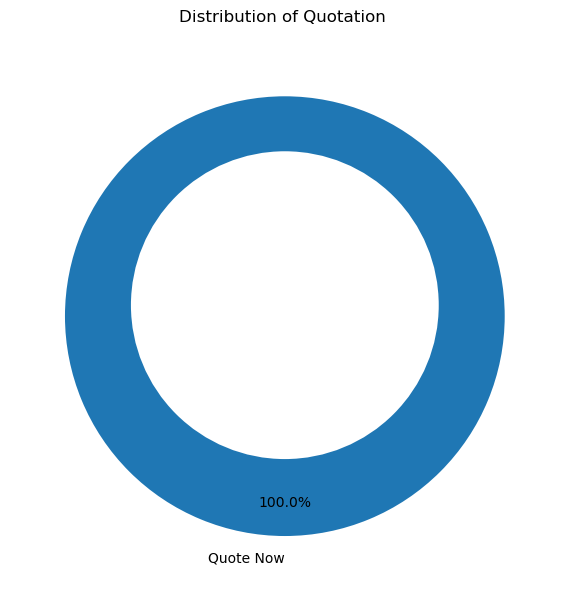

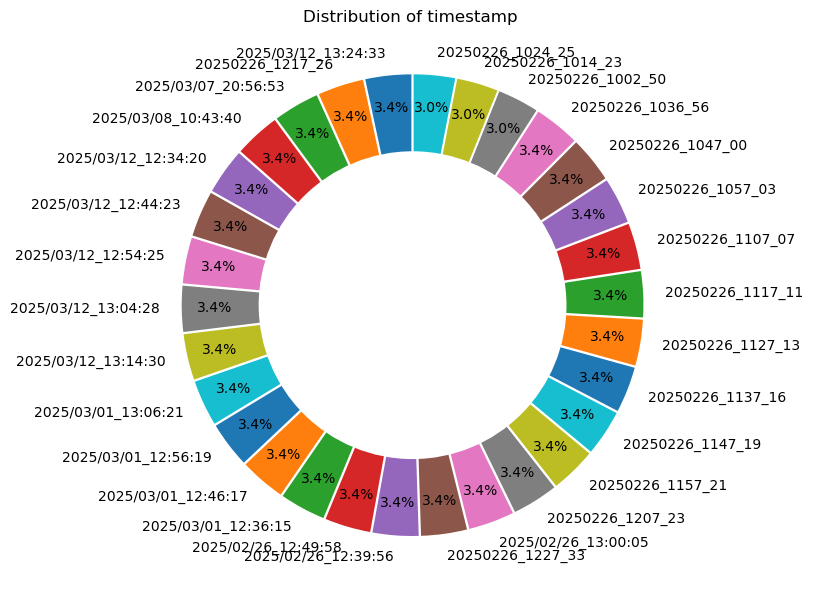

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\lokes\Desktop\Data Engineering\trucksuvidha_loaddata.csv")

for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(8, 6))
        value_counts = df[column].value_counts()

        # Filter values greater than 2%
        filtered_values = value_counts[value_counts / value_counts.sum() > 0.02]

        # Explode slices for better visibility
        explode = [0.05] * len(filtered_values)  # Adjust explosion value as needed

        plt.pie(filtered_values, labels=filtered_values.index, autopct='%1.1f%%',
                startangle=90, pctdistance=0.85, explode=explode)

        # Draw circle to make it a donut chart
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)

        plt.title(f'Distribution of {column} ')
        plt.tight_layout()  # Adjust layout to prevent labels from being cut off
        plt.show()

In [13]:
import pandas as pd
df= pd.read_csv(r"C:\Users\lokes\Desktop\Data Engineering\trucksuvidha_loaddata.csv")
unique_destinations = df['Destination City'].unique()
print(unique_destinations)

# To count the occurrences of each unique destination:
destination_counts = df['Destination City'].value_counts()
print(destination_counts)

['Bangalore (KA)' 'Noida (UP)' 'Nagpur (MH)' 'Hisar (HR)' 'Hyd (AP)'
 'Vapi (GJ)' 'Surada (OR)' 'Bihar (BR)' 'Dhar (MP)' 'Nagamangala (KA)'
 'Chennai (TN)' 'Kanad (MP)' 'Bhogaon (UP)' 'Koppal (KA)' 'Nashik (MH)'
 'Deverapalli (AP)' 'Ghaziabad (UP)' 'Tezpur (AS)' 'Agra (UP)'
 'Raajsamand (RJ)' 'Silchar (AS)' 'S Bala (JK)' 'Guwahati (AS)'
 'Pune (MH)' 'C N Halli (KA)' 'Salem (TN)' 'Cuttack (OR)' 'Blaspur (HP)'
 'Jajpur (OR)' 'Ahmedabad (GJ)' 'Gulbarga (KA)' 'Madakasira (AP)'
 'Bikram (BR)' 'Banglore (KA)' 'Bhopal (MP)' 'Rajkot (GJ)' 'Bagafa (TR)'
 'Jaipur (RJ)']
Destination City
Noida (UP)          72
Bangalore (KA)      40
Deverapalli (AP)    26
Vapi (GJ)           24
Nagpur (MH)         23
Hyd (AP)            22
Hisar (HR)          19
Surada (OR)         18
Bihar (BR)          18
Dhar (MP)           15
Banglore (KA)       12
Bhogaon (UP)         8
Bagafa (TR)          6
Rajkot (GJ)          6
Bhopal (MP)          6
Jaipur (RJ)          6
Nagamangala (KA)     4
Nashik (MH)          4
Ch

In [15]:
!pip install geopy

In [21]:
from geopy.geocoders import Nominatim
import pandas as pd
import time
import os
import geopy.extra.rate_limiter


def get_city_data(city_name):
    geolocator = Nominatim(user_agent="city_data_collector")
    geocode = geopy.extra.rate_limiter.RateLimiter(geolocator.geocode, min_delay_seconds=1)

    location = geocode(city_name)

    if location:
        latitude = location.latitude
        longitude = location.longitude
        # Population data is not always available, so handle the exception
        try:
            population = location.raw['extratags']['population']
        except KeyError:
            population = "Not available"

        return latitude, longitude, population
    else:
        return None, None, None

# Assuming your DataFrame is named 'df' and has a 'Destination' column
city_data = []
for city in df['Destination City'].unique():  # Get unique destination cities
    latitude, longitude, population = get_city_data(city)
    if latitude and longitude:
        city_data.append([city, latitude, longitude, population])  # Include city name here

# Create a DataFrame for city data
city_df = pd.DataFrame(city_data, columns=['City', 'Latitude', 'Longitude', 'Population']) 

file_path = r"C:\Users\lokes\Desktop\Data Engineering\destination_data.csv"
# If file exists, overwrite it. Otherwise, create and write data with header.
# This ensures data consistency
city_df.to_csv(file_path, mode='w', header=True, index=False)  
  
print(f"Data collected and saved at {file_path}")

Data collected and saved at C:\Users\lokes\Desktop\Data Engineering\destination_data.csv


In [29]:
import pandas as pd
df = pd.read_csv(r"C:\Users\lokes\Desktop\Data Engineering\trucksuvidha_loaddata.csv")  # Original DataFrame
destination_data = pd.read_csv(r"C:\Users\lokes\Desktop\Data Engineering\destination_data.csv")  # Destination data

In [31]:
original_destinations = df['Destination City'].unique()
stored_destinations = destination_data['City'].unique()  # Assuming 'Destination City' is the column name

In [33]:
missing_destinations = set(original_destinations) - set(stored_destinations)
if len(missing_destinations) == 0:
   print("All destination cities from the original data are present in destination_data.csv")
else:
   print("The following destination cities are missing in destination_data.csv:")
print(missing_destinations)

All destination cities from the original data are present in destination_data.csv
set()
